In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import kstest
import matplotlib.pyplot as plt

In [13]:
# Sample dataset
data = {
    "Open": [0.98408, 0.98389, 0.98413, 0.98390, 0.98423],
    "High": [0.98427, 0.98422, 0.98451, 0.98428, 0.98442],
    "Low": [0.98359, 0.98355, 0.98363, 0.98370, 0.98406],
    "Close": [0.98390, 0.98412, 0.98390, 0.98423, 0.98417]
}

In [14]:
df = pd.DataFrame(data)

In [15]:
# Pilih kolom 'Close' untuk di-normalisasi
close_data = df["Close"].values.reshape(-1, 1)

In [16]:
# Step 1: Transformasi ke distribusi normal menggunakan QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
normalized_close = quantile_transformer.fit_transform(close_data)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn(


In [17]:
# Step 2: Verifikasi dengan K-S Test
mean, std = normalized_close.mean(), normalized_close.std()
statistic, p_value = kstest(normalized_close, 'norm', args=(mean, std))
print(f"K-S Statistic: {statistic}, p-value: {p_value}")

K-S Statistic: [0.26237593], p-value: [0.80432333]


In [22]:
# Step 3: Plot hasil transformasi
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Frekuensi')

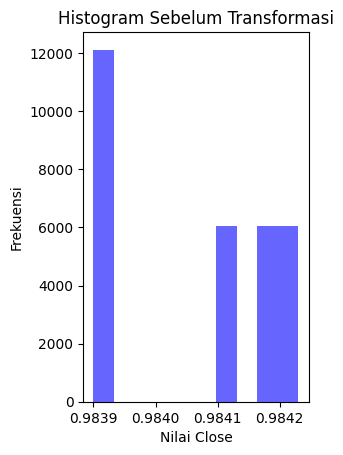

In [19]:
# Histogram sebelum transformasi
plt.subplot(1, 2, 1)
plt.hist(close_data, bins=10, density=True, alpha=0.6, color='b', label='Before Transformation')
plt.title("Histogram Sebelum Transformasi")
plt.xlabel("Nilai Close")
plt.ylabel("Frekuensi")


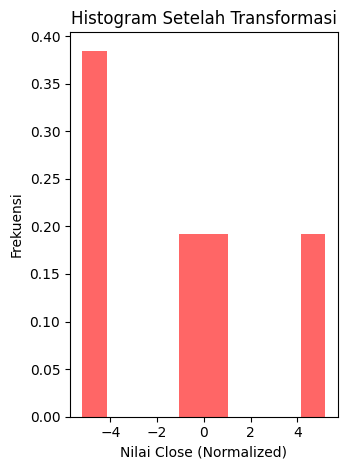

In [20]:
# Histogram setelah transformasi
plt.subplot(1, 2, 2)
plt.hist(normalized_close, bins=10, density=True, alpha=0.6, color='r', label='After Transformation')
plt.title("Histogram Setelah Transformasi")
plt.xlabel("Nilai Close (Normalized)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


In [21]:
# Tampilkan hasil transformasi
print("\nData Normalized:")
print(normalized_close)


Data Normalized:
[[-5.19933758]
 [ 0.        ]
 [-5.19933758]
 [ 5.19933758]
 [ 0.67448975]]
